In [22]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [25]:
dados = pd.read_csv(
    r"D:\analise_regioes_vendas\excelfiles\super_loja.csv",sep=";",encoding="latin-1")

In [26]:
dados.rename(columns={
    'ID da fila': 'id_da_fila',
    'ID do pedido': 'id_do_pedido',
    'Data do pedido': 'data_do_pedido',
    'Data de envio': 'data_de_envio',
    'Modo de envio': 'modo_de_envio',
    'ID do cliente': 'id_do_cliente',
    'Nome do cliente': 'nome_do_cliente',
    'Segmento': 'segmento',
    'Cidade': 'cidade',
    'Estado': 'estado',
    'País/Região': 'pais_regiao',
    'Região': 'regiao',
    'ID do produto': 'id_do_produto',
    'Categoria': 'categoria',
    'Sub-categoria': 'sub_categoria',
    'Nome do produto': 'nome_do_produto',
    'Vendas': 'vendas',
    'Quantidade': 'quantidade',
    'Desconto': 'desconto',
    'Lucro': 'lucro'
}, inplace=True)

In [27]:
dados[['vendas','desconto','lucro']] = dados[['vendas','desconto','lucro']].applymap(lambda k: float(str(k).replace(",",".")))

In [28]:
negativos = dados[['nome_do_produto','id_do_produto','lucro']]
negativos[negativos['lucro'] <= 0]

,nome_do_produto,id_do_produto,lucro
16,"Jiffy Fita dupla face, Vermelho",MAT-EN-10001346,-66.00
17,"Deflect-O Moldura, Embalagem multipack",MÓV-MÓ-10002468,-1491.00
18,"GlobeWeis Malote, Prata",MAT-EN-10004794,-60.64
19,"Jiffy Envelope com fecho, Reciclado",MAT-EN-10003820,-48.36
23,"Acco Encadernadora, Transparente",MAT-FI-10002744,-202.20
...,...,...,...
10257,"HON Etiquetas de envio, Ajustável",MAT-ET-10003909,-81.84
10258,"Jiffy Fita dupla face, Vermelho",MAT-EN-10001954,-64.40
10259,"Harbour Creations Cadeira de praia, Vermelho",MÓV-CA-10004481,-407.04
10260,"Ikea Par, Preto",MÓV-ES-10003288,-199.28


In [29]:
dados['data_do_pedido'] = pd.to_datetime(dados['data_do_pedido'],errors='coerce')

In [30]:
df = dados.groupby(['data_do_pedido'])[['vendas'
                                        ,'quantidade','lucro','desconto']].sum().reset_index()

In [31]:
df

,data_do_pedido,vendas,quantidade,lucro,desconto
0,2018-01-02,4922.6400,10,-0.9600,1.200
1,2018-01-04,234.6000,3,93.6000,0.000
2,2018-01-06,24292.6188,25,5506.8188,1.406
3,2018-01-07,29505.3000,57,5043.9000,3.900
4,2018-01-09,10630.8420,24,-7904.9580,1.502
...,...,...,...,...,...
475,2021-12-08,12991.3324,23,31.7324,0.602
476,2021-12-09,64515.3064,74,-2714.8936,2.802
477,2021-12-10,20431.0000,10,7471.0000,0.000
478,2021-12-11,50476.7968,71,16388.3968,1.204


In [32]:
df.corr()


,data_do_pedido,vendas,quantidade,lucro,desconto
data_do_pedido,1.000000,0.219313,0.290094,0.066578,0.193496
vendas,0.219313,1.000000,0.799246,0.408541,0.427050
quantidade,0.290094,0.799246,1.000000,0.244987,0.665781
lucro,0.066578,0.408541,0.244987,1.000000,-0.291339
desconto,0.193496,0.427050,0.665781,-0.291339,1.000000


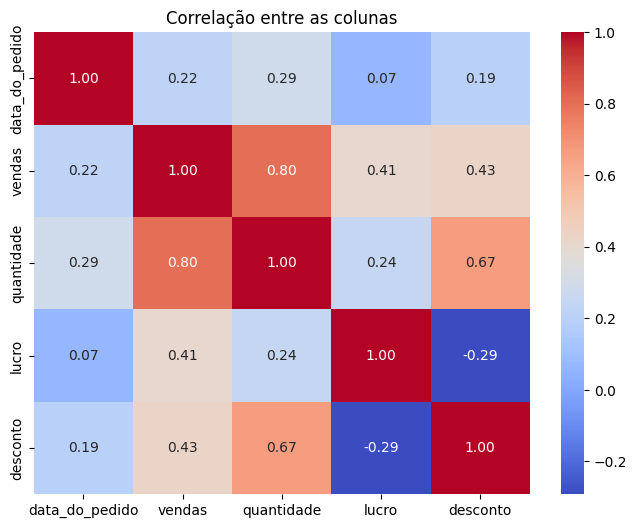

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre as colunas")
plt.show()

Text(0.5, 1.0, 'Vendas')

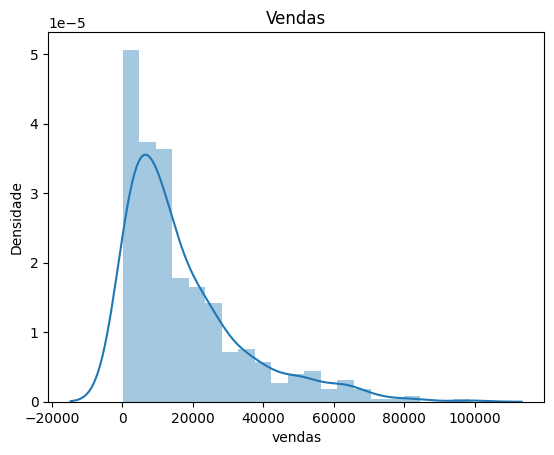

In [34]:
ax = sns.distplot(df.vendas)
ax.set(xlabel='vendas', ylabel='Densidade')
ax.set_title('Vendas')

Text(0.5, 1.0, 'Distribuição vendas')

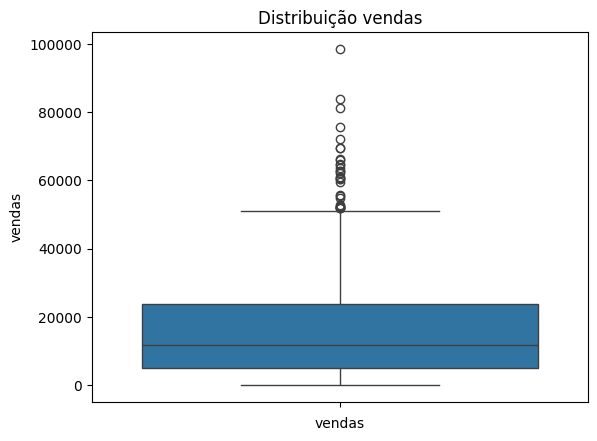

In [35]:
ax = sns.boxplot(df.vendas)
ax.set(xlabel='vendas')
ax.set_title('Distribuição vendas')

In [36]:
X = df.drop(['vendas'],axis=1)
y = df['vendas']


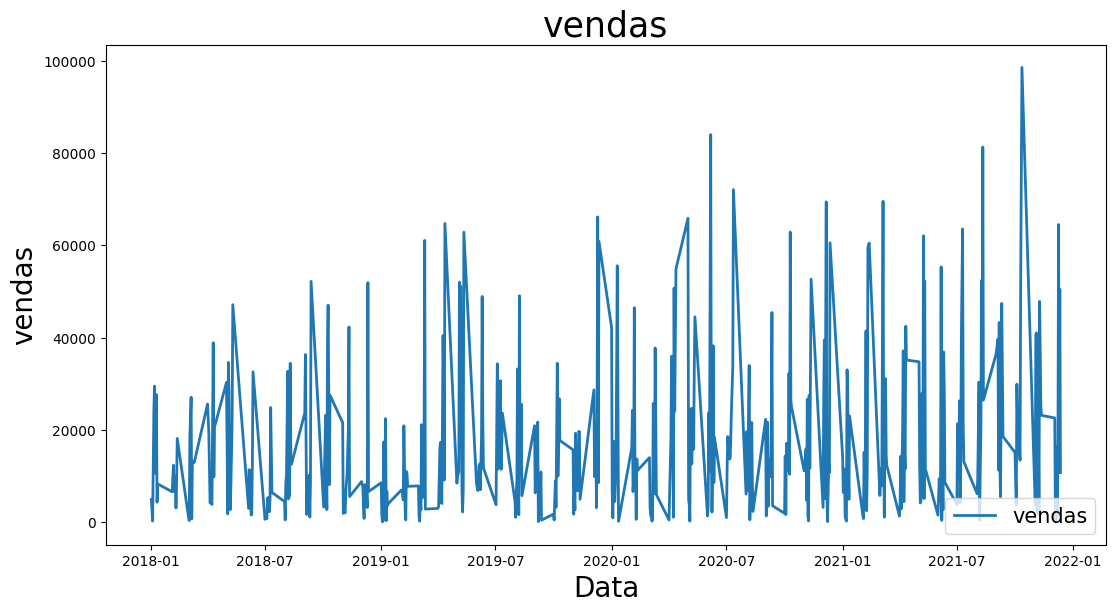

In [37]:
fig = plt.figure(figsize=(10,5))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data_do_pedido'], df['vendas'], lw=2)
eixo.set_title('vendas', fontsize=25)
eixo.set_ylabel('vendas', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.legend(['vendas'], loc = 'lower right', fontsize= 15)

In [38]:
dados.columns

Index(['id_da_fila', 'id_do_pedido', 'data_do_pedido', 'data_de_envio',
       'modo_de_envio', 'id_do_cliente', 'nome_do_cliente', 'segmento',
       'cidade', 'estado', 'pais_regiao', 'regiao', 'id_do_produto',
       'categoria', 'sub_categoria', 'nome_do_produto', 'vendas', 'quantidade',
       'desconto', 'lucro'],
      dtype='object')

In [39]:
dados.sub_categoria.unique()

array(['Etiquetas', 'Móveis', 'Estantes', 'Fichários', 'Arte',
       'Envelopes', 'Máquinas', 'Materiais', 'Acessórios', 'Colchetes',
       'Cadeiras', 'Copiadoras', 'Armazenamento', 'Telefones',
       'Eletrônicos', 'Mesas', 'Papel'], dtype=object)

In [40]:
dados.regiao.unique()

array(['Norte', 'Sul', 'Central', 'Caribe'], dtype=object)

In [41]:
dados.estado.unique()

array(['Distrito Federal', 'Risaralda', 'São Paulo', 'Managua', 'Panamá',
       'Chiapas', 'Santiago', 'Sonora', 'Francisco Morazán', 'Artemisa',
       'La Romana', 'Querétaro', 'Goiás', 'Distrito Nacional', 'Ceará',
       'Antioquia', 'México', 'Hidalgo', 'Maranhão',
       'Baixa Califórnia do Sul', 'Tamaulipas', 'Atlántida', 'Guantânamo',
       'Pernambuco', 'Novo Leão', 'Lima', 'Coahuila', 'Baixa Califórnia',
       'Chihuahua', 'Rio Grande do Norte', 'Guatemala', 'Camagüey',
       'Jalisco', 'Puebla', 'Cidade Autônoma de Buenos Aires', 'Morelos',
       'Huehuetenango', 'Chaco', 'Barahona', 'Paraná', 'Atlántico',
       'Portuguesa', 'Ouest', 'Paraíba', 'Granma', 'Guanajuato',
       'Mendoza', 'Rio Grande do Sul', 'Cortés', 'Holguín', 'Bahia',
       'Cienfuegos', 'Pinar del Rio', 'Carabobo', 'San Salvador', 'Salta',
       'Michoacán', 'Santiago de Cuba', 'Cundinamarca', 'Tolima',
       'Anzoátegui', 'Santa Ana', 'Villa Clara', 'Nayarit',
       'San Luis Potosí', 'Zulia',

In [42]:
dados.estado.value_counts()

estado
San Salvador         656
Managua              614
Distrito Federal     513
Distrito Nacional    443
São Paulo            409
                    ... 
Paysandú               1
La Rioja               1
Río Negro              1
Casanare               1
Lambayeque             1
Name: count, Length: 198, dtype: int64

In [43]:
dados.categoria.value_counts()

categoria
Material de escritório    5838
Móveis                    2376
Tecnologia                2048
Name: count, dtype: int64

In [44]:
dados['Status'] = dados.lucro.apply(lambda k: 'Negativo' if k <= 0 else 'Baixo' if k <=5 else 'Aceitavel')

In [45]:
dados['Status'].value_counts()

Status
Aceitavel    7291
Negativo     2839
Baixo         132
Name: count, dtype: int64

In [46]:
dados['estado'].value_counts()

estado
San Salvador         656
Managua              614
Distrito Federal     513
Distrito Nacional    443
São Paulo            409
                    ... 
Paysandú               1
La Rioja               1
Río Negro              1
Casanare               1
Lambayeque             1
Name: count, Length: 198, dtype: int64

In [47]:
lucro_regiao = dados.groupby(['estado'])[['vendas','quantidade','lucro']].sum().reset_index()

In [48]:
lucro_categoria = dados.groupby(['categoria'])[['vendas','quantidade','lucro']].sum().reset_index()
lucro_categoria

,categoria,vendas,quantidade,lucro
0,Material de escritório,5.614651e+06,21957,7.898896e+05
1,Móveis,8.092142e+06,8838,4.124542e+05
2,Tecnologia,7.882130e+06,7582,1.010532e+06


In [49]:
lucro_categoria_regiao = dados.groupby(['categoria','regiao'])[['vendas','quantidade','lucro']].sum().reset_index()
lucro_categoria_regiao

,categoria,regiao,vendas,quantidade,lucro
0,Material de escritório,Caribe,8.726368e+05,3548,142897.3600
1,Material de escritório,Central,1.587459e+06,6259,160263.3600
2,Material de escritório,Norte,1.606237e+06,5670,386750.0000
3,Material de escritório,Sul,1.548318e+06,6480,99978.8400
4,Móveis,Caribe,1.157942e+06,1395,57487.2000
5,Móveis,Central,2.262611e+06,2433,192117.1000
6,Móveis,Norte,2.157263e+06,2372,103840.2000
7,Móveis,Sul,2.514327e+06,2638,59009.7400
8,Tecnologia,Caribe,1.158322e+06,1234,139960.2800
9,Tecnologia,Central,2.155030e+06,2179,209255.0464


In [50]:
lucro_categoria_uf= dados.groupby(['categoria','estado'])[['vendas','quantidade','lucro']].sum().reset_index()
lucro_categoria_uf

,categoria,estado,vendas,quantidade,lucro
0,Material de escritório,Acre,887.6000,10,279.4000
1,Material de escritório,Alagoas,21581.4000,129,-8558.0000
2,Material de escritório,Amapá,3093.6000,17,503.4000
3,Material de escritório,Amazonas,14254.0000,73,3227.6000
4,Material de escritório,Ancash,1093.2000,11,-163.2000
...,...,...,...,...,...
525,Tecnologia,Villa Clara,67632.9764,60,18023.3764
526,Tecnologia,Yoro,8233.8256,16,-2904.9744
527,Tecnologia,Yucatán,63308.1392,61,14066.9392
528,Tecnologia,Zacatecas,6377.0000,7,317.8000


In [51]:
lucro_categoria_uf_regiao= dados.groupby(['categoria','estado','regiao'])[['vendas','quantidade','lucro']].sum().reset_index()
lucro_categoria_uf_regiao

,categoria,estado,regiao,vendas,quantidade,lucro
0,Material de escritório,Acre,Sul,887.6000,10,279.4000
1,Material de escritório,Alagoas,Sul,21581.4000,129,-8558.0000
2,Material de escritório,Amapá,Sul,3093.6000,17,503.4000
3,Material de escritório,Amazonas,Sul,14254.0000,73,3227.6000
4,Material de escritório,Ancash,Sul,1093.2000,11,-163.2000
...,...,...,...,...,...,...
534,Tecnologia,Villa Clara,Caribe,67632.9764,60,18023.3764
535,Tecnologia,Yoro,Central,8233.8256,16,-2904.9744
536,Tecnologia,Yucatán,Norte,63308.1392,61,14066.9392
537,Tecnologia,Zacatecas,Norte,6377.0000,7,317.8000


Text(0.5, 1.0, 'Vendas')

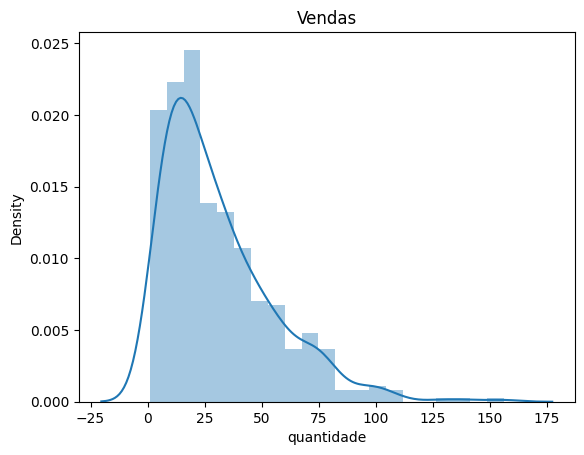

In [52]:
ax = sns.distplot(df.quantidade)
ax.set_title('Vendas')

In [53]:
lucro_categoria_uf_regiao.lucro.min()

-72562.46

In [54]:
lucro_categoria_uf_regiao.lucro.max()

156661.96

Text(0.5, 1.0, 'Lucro')

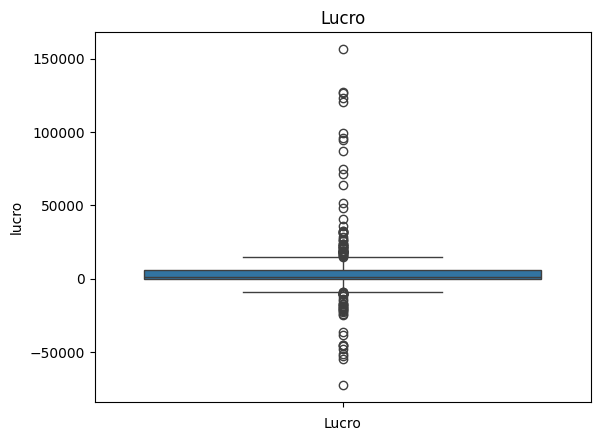

In [55]:
ax = sns.boxplot(lucro_categoria_uf_regiao.lucro)
ax.set(xlabel='Lucro')
ax.set_title('Lucro')